# k近傍法

1. kの値と距離指標を選択する
2. 分類したいサンプルからk個の最近傍のデータ点を見つけ出す
3. 多数決によりクラスラベルを割りあてる

メリット：新しいデータを集めるとすぐ分類器が適応できる<br>
デメリット：新しいサンプルを分類する計算量がトレーニングデータサンプルの個数に比例して増加する

参考）<br>
パラメトリックモデル…トレーニングデータからパラメータを推定する。元のデータがなくても新しいデータを分類できる<br>
ノンパラメトリックモデル…固定のパラメータ集合では特徴付けができず、パラメータの個数はトレーニングデータセットともに増加する<br>


In [1]:
from sklearn import datasets
import numpy as np

# iris データセットをロード
iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target

from sklearn.model_selection import train_test_split
# 全体の30% をテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 計算した結果を元にデータを標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 同様にクラスラベルも結合
y_combined = np.hstack((y_train, y_test))

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, xlabel='x', ylabel='y', title='title', legend_loc='upper left'):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'o', 'v', '^', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, aplha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
        # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')
        
    # 軸のラベルの設定
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # タイトル設定
    plt.title(title)
    # 凡例の設定
    plt.legend(loc=legend_loc)
    # 図の表示
    plt.show()

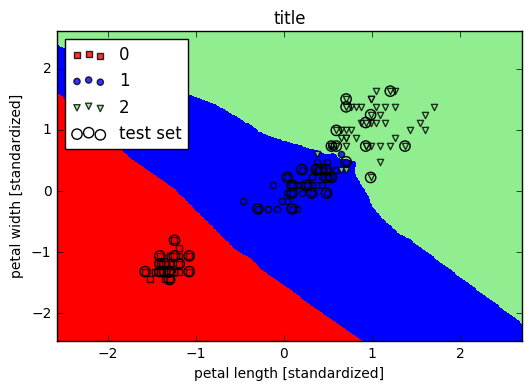

In [3]:
from sklearn.neighbors import KNeighborsClassifier
# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# モデルにデータをfitさせる
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150),
                      xlabel='petal length [standardized]', ylabel='petal width [standardized]')

距離指標は多くの場合、単純なユークリッド距離が使用される<br>
ユークリッド距離を使用する場合、各特徴量が距離に等しく寄与するよう、データを標準化することが重要になる<br>
上記で利用したminkowskiはユークリッド距離とマンハッタン距離を一般化したものであり、以下のように表現できる<br>

$$
d(x^{(i)}, x^{(j)}) = \sqrt[p]{\sum_k|x_k^{(i)} - x_k^{(j)}|^p}
$$

p=2を設定した場合はユークリッド距離となり、p=1を設定した場合はマンハッタン距離となる